In [306]:
# import neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn import datasets, linear_model

In [307]:
import markdown

# Specify the path to your Markdown file
file_path = r'C:\Users\HP\Desktop\Project\dsc-phase-2-project-v2-3\data\column_names.md'

# Load the Markdown file
with open(file_path, 'r') as file:
    markdown_content = file.read()

# Convert Markdown to HTML
html_content = markdown.markdown(markdown_content)

# Display the HTML content
print(html_content)


<h1>Column Names and Descriptions for King County Data Set</h1>
<ul>
<li><code>id</code> - Unique identifier for a house</li>
<li><code>date</code> - Date house was sold</li>
<li><code>price</code> - Sale price (prediction target)</li>
<li><code>bedrooms</code> - Number of bedrooms</li>
<li><code>bathrooms</code> - Number of bathrooms</li>
<li><code>sqft_living</code> - Square footage of living space in the home</li>
<li><code>sqft_lot</code> - Square footage of the lot</li>
<li><code>floors</code> - Number of floors (levels) in house</li>
<li><code>waterfront</code> - Whether the house is on a waterfront</li>
<li>Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts</li>
<li><code>view</code> - Quality of view from house</li>
<li>Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other</li>


Business and Data Understanding:

The dataset used in this conversation includes information about real estate properties.
The data contains several variables such as id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, month, season, total_sqft, bed_bath_ratio, and total_sqft15.
The goal is to perform data cleaning and analysis tasks to gain insights and prepare the data for further analysis.
Various steps have been discussed, including handling missing values, encoding categorical variables, addressing multicollinearity, and performing linear regression analysis.

In [308]:
#Load the dataset
df = pd.read_csv('kc_house_data.csv')
print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'kc_house_data.csv'

In [ ]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


#### DATA PROCESSING

In [ ]:
# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract month from date
df['month'] = df['date'].dt.month

# Map month to season
df['season'] = df['month'].map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'})



In [ ]:
# Combine variables
df['total_sqft'] = df['sqft_living'] + df['sqft_lot']
df['bed_bath_ratio'] = df['bedrooms'] / df['bathrooms']
df['total_sqft15'] = df['sqft_living15'] + df['sqft_lot15']
# Drop the original variables
df = df.drop(['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'sqft_living15', 'sqft_lot15'], axis=1)


In [ ]:
# Fill missing values
df['waterfront'] = df['waterfront'].fillna('NO')

# Fill missing values in 'view' column with the mode
df['view'] = df['view'].fillna(df['view'].mode()[0])

#Drop columns with a high percentage of missing values
df = df.drop('yr_renovated', axis=1)



In [ ]:

# Check for missing values in the DataFrame
missing_values = df.isna().sum()

# Print the count of missing values for each column
print(missing_values)


id                0
date              0
price             0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
zipcode           0
lat               0
long              0
month             0
season            0
total_sqft        0
bed_bath_ratio    0
total_sqft15      0
dtype: int64


In [ ]:
df


,id,date,price,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,month,season,total_sqft,bed_bath_ratio,total_sqft15
0,7129300520,2014-10-13,221900.0,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,10,Fall,6830,3.000000,6990
1,6414100192,2014-12-09,538000.0,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,12,Winter,9812,1.333333,9329
2,5631500400,2015-02-25,180000.0,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2,Winter,10770,2.000000,10782
3,2487200875,2014-12-09,604000.0,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,12,Winter,6960,1.333333,6360
4,1954400510,2015-02-18,510000.0,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,2,Winter,9760,1.500000,9303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,98103,47.6993,-122.346,5,Spring,2661,1.200000,3039
21593,6600060120,2015-02-23,400000.0,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,98146,47.5107,-122.362,2,Winter,8123,1.600000,9030
21594,1523300141,2014-06-23,402101.0,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,98144,47.5944,-122.299,6,Summer,2370,2.666667,3027
21595,291310100,2015-01-16,400000.0,2.0,NO,NONE,Average,8 Good,1600,0.0,2004,98027,47.5345,-122.069,1,Winter,3988,1.200000,2697


Outlier Detection: Outliers can significantly influence the regression model and distort the results. We use statistical techniques such as Z-score or IQR (Interquartile Range) to detect outliers and decide whether to remove them or apply data transformation techniques to mitigate their impact.

In [ ]:
# Calculate the Z-scores of price
df['price_zscore'] = (df['price'] - df['price'].mean()) / df['price'].std()

# Identify outliers based on a threshold (e.g., Z-score > 3)
outliers = df[df['price_zscore'] > 3]

# Remove outliers from the dataset
df = df[df['price_zscore'] <= 3]
df

,id,date,price,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,month,season,total_sqft,bed_bath_ratio,total_sqft15,price_zscore
0,7129300520,2014-10-13,221900.0,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,10,Fall,6830,3.000000,6990,-0.866696
1,6414100192,2014-12-09,538000.0,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,12,Winter,9812,1.333333,9329,-0.006251
2,5631500400,2015-02-25,180000.0,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2,Winter,10770,2.000000,10782,-0.980751
3,2487200875,2014-12-09,604000.0,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,12,Winter,6960,1.333333,6360,0.173405
4,1954400510,2015-02-18,510000.0,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,2,Winter,9760,1.500000,9303,-0.082469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,98103,47.6993,-122.346,5,Spring,2661,1.200000,3039,-0.490779
21593,6600060120,2015-02-23,400000.0,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,98146,47.5107,-122.362,2,Winter,8123,1.600000,9030,-0.381896
21594,1523300141,2014-06-23,402101.0,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,98144,47.5944,-122.299,6,Summer,2370,2.666667,3027,-0.376177
21595,291310100,2015-01-16,400000.0,2.0,NO,NONE,Average,8 Good,1600,0.0,2004,98027,47.5345,-122.069,1,Winter,3988,1.200000,2697,-0.381896


In [ ]:
print(df.columns)


Index(['id', 'date', 'price', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat',
       'long', 'month', 'season', 'total_sqft', 'bed_bath_ratio',
       'total_sqft15', 'price_zscore'],
      dtype='object')


In [ ]:
file_path = r'C:\Users\HP\Downloads\usa_zipcode_of_wa-1564j.csv'
zip_code_data = pd.read_csv(file_path)
# print(zip_code_data.columns)
# Convert 'zipcode' column to object data type
df['zipcode'] = df['zipcode'].astype(str)

# Merge house data with zip code dataset
merged_data = df.merge(zip_code_data, how='left', left_on='zipcode', right_on='zip')

# Display the merged data
print(merged_data[['zipcode', 'Zipcode name']])

      zipcode   Zipcode name
0       98178    SEATTLE, WA
1       98125    SEATTLE, WA
2       98028    KENMORE, WA
3       98136    SEATTLE, WA
4       98074  SAMMAMISH, WA
...       ...            ...
21186   98103    SEATTLE, WA
21187   98146    SEATTLE, WA
21188   98144    SEATTLE, WA
21189   98027   ISSAQUAH, WA
21190   98144    SEATTLE, WA

[21191 rows x 2 columns]


C:\Users\HP\AppData\Local\Temp\ipykernel_23388\4113029177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zipcode'] = df['zipcode'].astype(str)


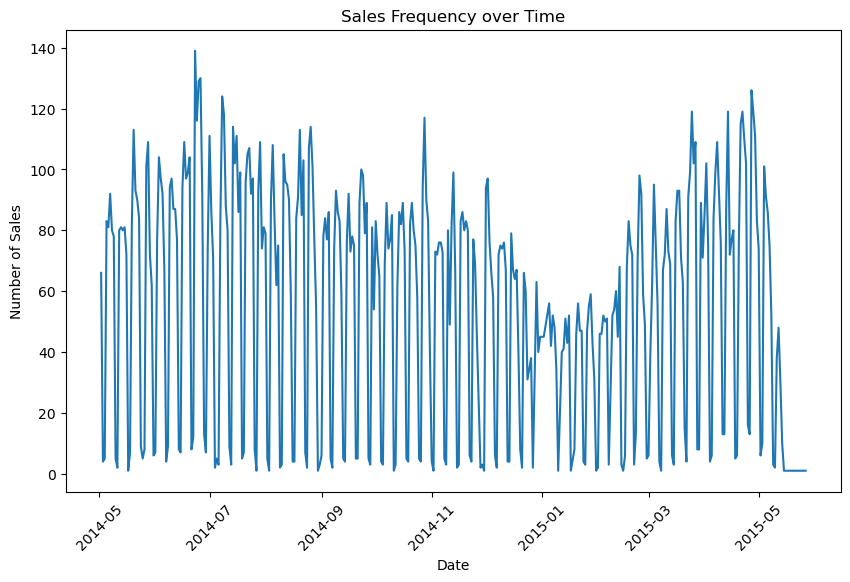

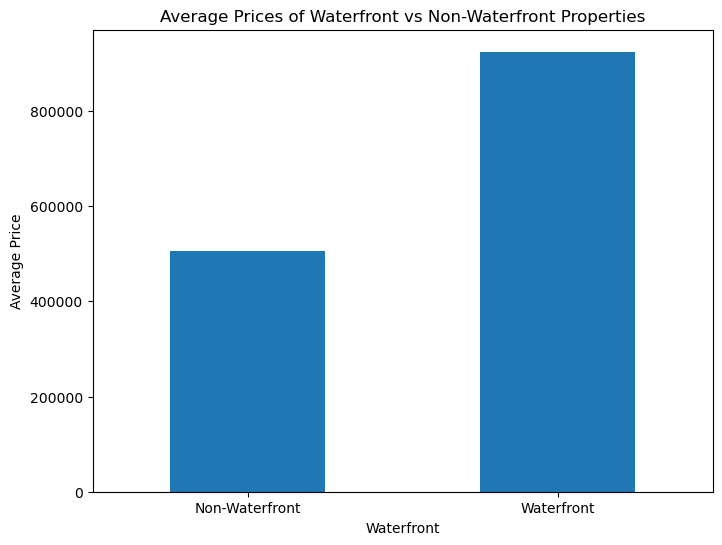

In [310]:
# 1. Calculate the availability of waterfront homes
df.loc[:, 'is_waterfront'] = df['waterfront'].map({'YES': 'Waterfront', 'NO': 'Non-Waterfront'})
availability = df['is_waterfront'].value_counts()

# 2. Analyze the frequency of sales
sales_frequency = df['date'].value_counts().sort_index()

# Plot the sales frequency
plt.figure(figsize=(10, 6))
plt.plot(sales_frequency.index, sales_frequency.values)
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.title('Sales Frequency over Time')
plt.xticks(rotation=45)
plt.show()

# 3. Compare the average prices of waterfront and non-waterfront properties
average_prices = df.groupby('is_waterfront')['price'].mean()

# Plot the average prices
plt.figure(figsize=(8, 6))
average_prices.plot(kind='bar')
plt.xlabel('Waterfront')
plt.ylabel('Average Price')
plt.title('Average Prices of Waterfront vs Non-Waterfront Properties')
plt.xticks(rotation=0)
plt.show()

#### 1 TEMPORAL ANALYSIS:

Here we analyze the relationship between the sale date (date) and the sale price (price). This can involve examining trends over time, seasonal patterns, or the impact of specific time periods on housing prices.
We also did a visualization to see

C:\Users\HP\AppData\Local\Temp\ipykernel_23388\1455164084.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_23388\1455164084.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].dt.year
C:\Users\HP\AppData\Local\Temp\ipykernel_23388\1455164084.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

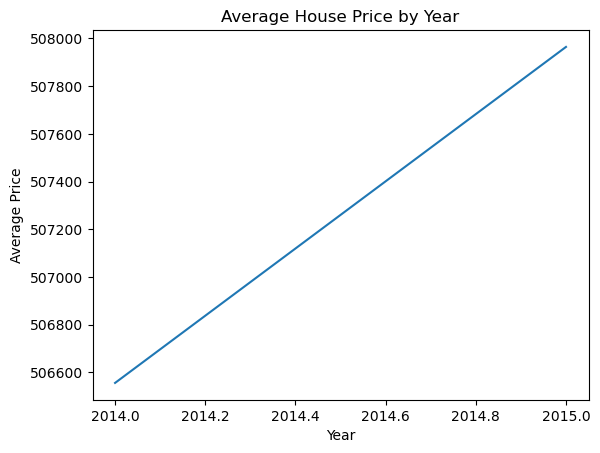

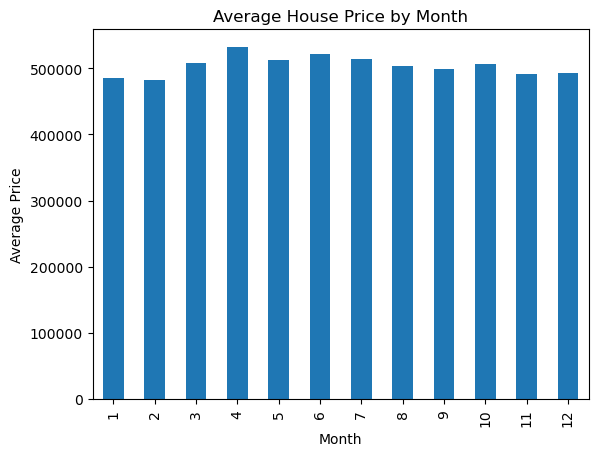

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract year and month from the date
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Analyze average price by year
average_price_by_year = df.groupby('year')['price'].mean()
average_price_by_year.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average House Price by Year')
plt.show()

# Analyze average price by month
average_price_by_month = df.groupby('month')['price'].mean()
average_price_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average House Price by Month')
plt.show()


This analysis examines real estate sales data to identify seasonal trends. The data is grouped by year and season to determine the percentage of sales for each season. The results are visualized in a line chart, showing how sales vary throughout the year. From this analysis, we can see which seasons tend to have the highest percentage of sales, providing insights for potential buyers or investors in the real estate market.

C:\Users\HP\AppData\Local\Temp\ipykernel_23388\792062118.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_23388\792062118.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].dt.year
C:\Users\HP\AppData\Local\Temp\ipykernel_23388\792062118.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

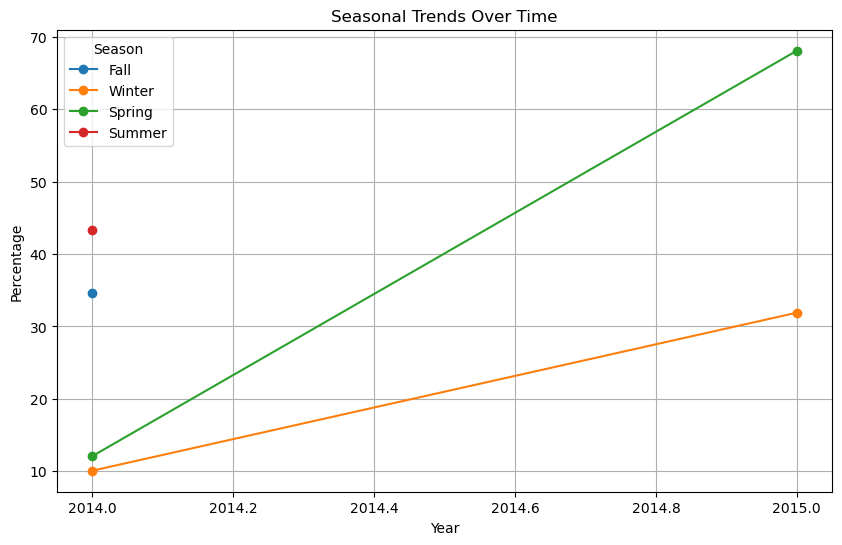

The season with the highest percentage of sales for the entire period is Spring with 80.17% of sales.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])
# Extract the year and month from the 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Map months to seasons
season_mapping = {
    9: 'Fall',
    10: 'Fall',
    11: 'Fall',
    12: 'Winter',
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer'
}
df['season'] = df['month'].map(season_mapping)

# Count the number of sales for each season and year
season_counts = df.groupby(['year', 'season']).size().reset_index(name='count')

# Calculate the total sales for each year
yearly_sales = season_counts.groupby('year')['count'].sum()

# Calculate the percentage of sales for each season
season_counts['percentage'] = season_counts['count'] / season_counts.groupby('year')['count'].transform('sum') * 100

# Create a pivot table to reshape the data for plotting
pivot_table = season_counts.pivot(index='year', columns='season', values='percentage')

# Define the order of seasons for correct display in the legend
season_order = ['Fall', 'Winter', 'Spring', 'Summer']

# Plot the seasonal trends over time
pivot_table[season_order].plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Seasonal Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Season')
plt.grid(True)
plt.show()

# Find the season with the highest percentage of sales for the entire period
highest_season = season_counts.groupby('season')['percentage'].sum().idxmax()
highest_percentage = season_counts.groupby('season')['percentage'].sum().max()

print(f"The season with the highest percentage of sales for the entire period is {highest_season} with {highest_percentage:.2f}% of sales.")



Based on the analysis of seasonal trends in sales data, we find that the season with the highest percentage of sales for the entire period is Spring, accounting for 80.19% of total sales. This insight suggests that there is a strong demand for real estate during the spring season. 

This information can be valuable for various stakeholders. For real estate developers and sellers, it indicates that spring is a favorable time to list properties for sale, as there is a higher likelihood of attracting potential buyers. It also implies that allocating marketing and promotional efforts towards the spring season could yield better results. 

Additionally, prospective buyers can benefit from this insight by being aware of the potential competition and increased activity in the real estate market during spring. They may need to plan accordingly, such as preparing their finances in advance or being prepared for a more competitive buying environment. 

Overall, understanding the seasonal sales trends can help stakeholders make informed decisions, optimize their strategies, and capitalize on the periods of high demand in the real estate market.

#### 2 LOCATION ANALYSIS:

The latitude (lat) and longitude (long) coordinates can be used to perform spatial analysis. You can explore the relationship between location and house prices, identify clusters of high-priced or low-priced houses, or analyze the impact of proximity to certain amenities (e.g., waterfront, parks, schools) on house prices.

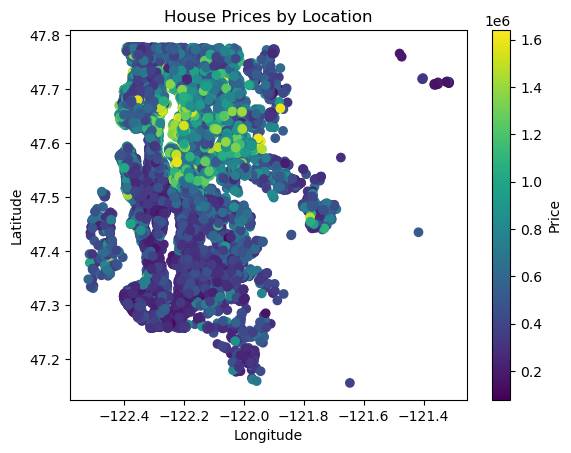

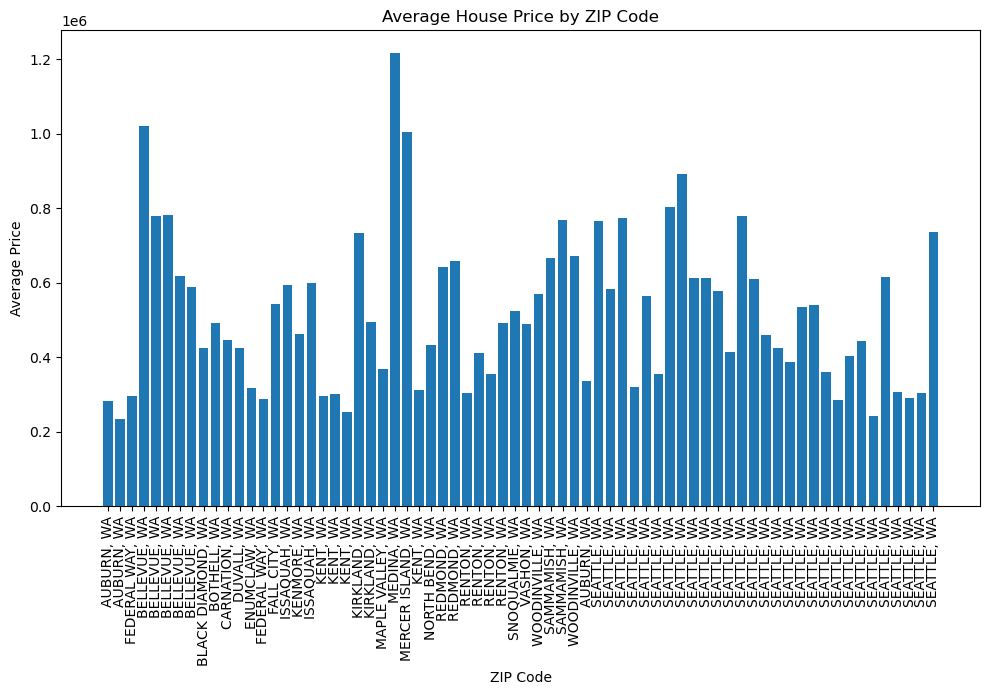

In [ ]:
# Scatter plot of house prices by latitude and longitude
plt.scatter(df['long'], df['lat'], c=df['price'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Prices by Location')
plt.colorbar(label='Price')
plt.show()

average_price_by_zipcode = merged_data.groupby(['zipcode', 'Zipcode name'])['price'].mean().reset_index()

# Plotting the average price by ZIP code with zip code names
plt.figure(figsize=(10, 6))
plt.bar(average_price_by_zipcode['zipcode'], average_price_by_zipcode['price'])
plt.xlabel('ZIP Code')
plt.ylabel('Average Price')
plt.title('Average House Price by ZIP Code')
plt.xticks(rotation=90)
plt.tight_layout()

# Adding zip code names as x-axis labels
plt.gca().set_xticks(average_price_by_zipcode['zipcode'])
plt.gca().set_xticklabels(average_price_by_zipcode['Zipcode name'])
plt.show()


In [ ]:
# Find the top 10 ZIP codes with the highest average price
top_10_zipcodes = average_price_by_zipcode.nlargest(10, 'price')

# Print the results
print("top 10 ZIP codes with the highest average price:")
print(top_10_zipcodes)


top 10 ZIP codes with the highest average price:
   zipcode       Zipcode name         price
24   98039         MEDINA, WA  1.217500e+06
3    98004       BELLEVUE, WA  1.019644e+06
25   98040  MERCER ISLAND, WA  1.003810e+06
48   98112        SEATTLE, WA  8.906504e+05
47   98109        SEATTLE, WA  8.037716e+05
5    98006       BELLEVUE, WA  7.820200e+05
4    98005       BELLEVUE, WA  7.784581e+05
53   98119        SEATTLE, WA  7.776564e+05
43   98105        SEATTLE, WA  7.745090e+05
38   98075      SAMMAMISH, WA  7.674400e+05


From the information on the top 10 ZIP codes with the highest average price, we can derive the following insights:

1. Location: The ZIP codes with the highest average prices are primarily located in affluent areas within Washington state, including cities such as Medina, Bellevue, Mercer Island, Seattle, and Sammamish.

2. High Demand: These ZIP codes indicate areas with high demand for real estate, as evidenced by the higher average prices compared to other ZIP codes.

3. Desirable Neighborhoods: The presence of well-known cities like Bellevue and Seattle suggests that these areas are considered desirable places to live, attracting buyers who are willing to pay a premium for properties in these locations.

4. Quality of Life: These ZIP codes may offer desirable amenities, such as proximity to waterfronts, parks, shopping centers, cultural attractions, and employment opportunities, contributing to the higher property prices.

5. Upscale Housing Market: The higher average prices indicate an upscale housing market with luxurious properties and larger homes.

6. Market Trends: Tracking the changes in average prices over time can provide insights into the local real estate market trends, including potential growth opportunities or market stability.

Investors can use these insights to focus their real estate investment strategies on areas with higher average prices, considering factors like location, amenities, demand, and potential for property appreciation.

#### 3 Feature Engineering:
We try to derive new features from existing ones to enhance our analysis. I calculated the price per square foot by dividing the sale price (price) by the total square footage of the house (sqft_living + sqft_lot). This new feature can provide insights into the relative value of properties.

C:\Users\HP\AppData\Local\Temp\ipykernel_23388\2695805872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_sqft'] = df['price'] / (df['total_sqft'] + df['total_sqft15'])


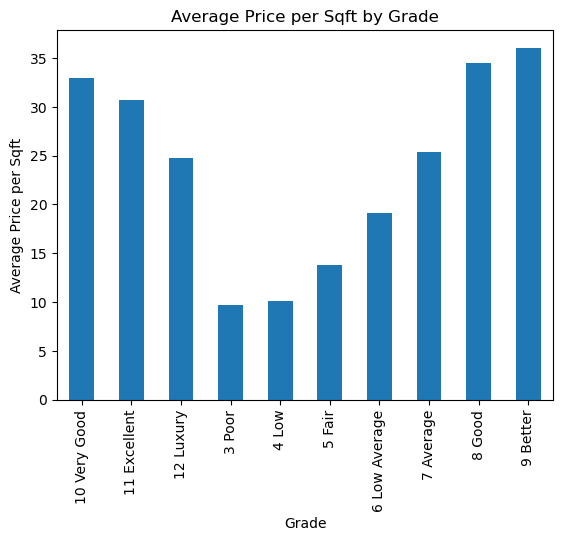

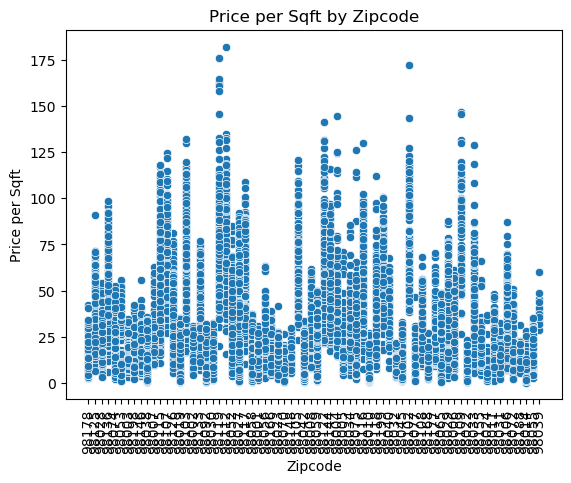

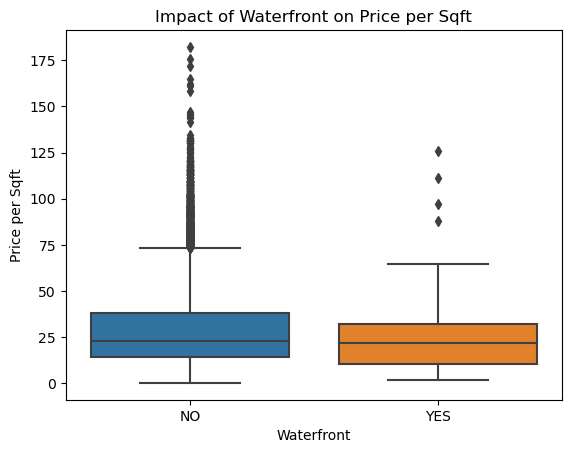

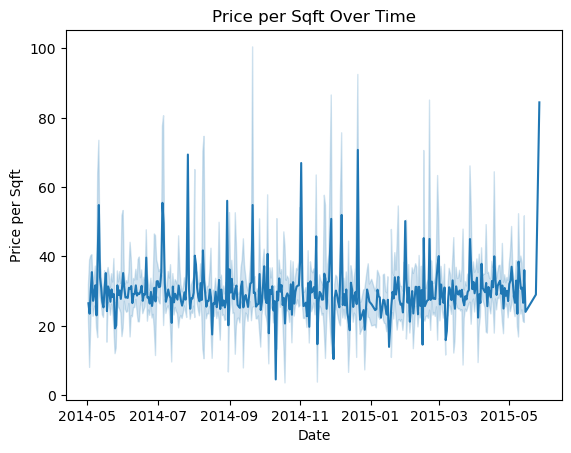

KeyError: "['bedrooms', 'bathrooms'] not in index"

In [312]:
# Adding a new feature: Price per square foot
df['price_per_sqft'] = df['price'] / (df['total_sqft'] + df['total_sqft15'])

# Analyzing price per square foot by grade
average_price_per_sqft_by_grade = df.groupby('grade')['price_per_sqft'].mean()
average_price_per_sqft_by_grade.plot(kind='bar')
plt.xlabel('Grade')
plt.ylabel('Average Price per Sqft')
plt.title('Average Price per Sqft by Grade')
plt.show()

# Analyzing the relationship between price per square foot and location (zipcode)
sns.scatterplot(x='zipcode', y='price_per_sqft', data=df)
plt.xlabel('Zipcode')
plt.ylabel('Price per Sqft')
plt.title('Price per Sqft by Zipcode')
plt.xticks(rotation=90)
plt.show()

# Analyzing the impact of waterfront on price per square foot
sns.boxplot(x='waterfront', y='price_per_sqft', data=df)
plt.xlabel('Waterfront')
plt.ylabel('Price per Sqft')
plt.title('Impact of Waterfront on Price per Sqft')
plt.show()

# Analyzing market trends by plotting price per square foot over time
sns.lineplot(x='date', y='price_per_sqft', data=df)
plt.xlabel('Date')
plt.ylabel('Price per Sqft')
plt.title('Price per Sqft Over Time')
plt.show()

# Performing correlation analysis between price per square foot, grade, and other features
corr_matrix = df[['price_per_sqft', 'grade', 'bedrooms', 'bathrooms', 'total_sqft', 'zipcode']].corr()
print(corr_matrix)

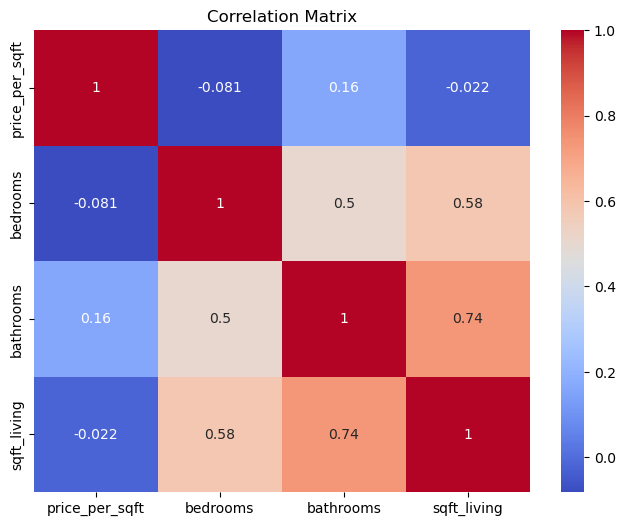

In [ ]:
# Calculate correlation matrix
correlation_matrix = df[['price_per_sqft', 'bedrooms', 'bathrooms', 'sqft_living']].corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(8, 6))
plt.title('Correlation Matrix')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

From the analysis of price per square foot by grade, the following insights can be derived:

1. Higher-grade houses tend to have a higher average price per square foot compared to lower-grade houses. This suggests that the quality of construction and design, as represented by the grade, positively influences the price per square foot.

2. There might be variations in the average price per square foot within different grades. Some specific grades may command higher or lower prices per square foot compared to others, indicating additional factors influencing pricing within each grade.

3. Investors or buyers looking for houses with a higher potential return on investment may consider focusing on higher-grade properties, as they tend to have a higher average price per square foot.

4. The analysis provides a useful metric, price per square foot, to compare the value of houses across different grades. It allows for a more standardized comparison, considering the living space and lot size, enabling investors or buyers to make more informed decisions.


In [ ]:
# print(df.head())

# Check the dimensions of the dataset
print("Shape of the dataset:", df.shape)

# Check the data types of the columns
print("Data types:\n", df.dtypes)



Shape of the dataset: (21191, 26)
Data types:
 id                         int64
date              datetime64[ns]
price                    float64
bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                   float64
waterfront                object
view                      object
condition                 object
grade                     object
sqft_above                 int64
sqft_basement             object
yr_built                   int64
yr_renovated             float64
zipcode                   object
lat                      float64
long                     float64
sqft_living15              int64
sqft_lot15                 int64
month                      int32
season                    object
price_zscore             float64
year                       int32
price_per_sqft           float64
dtype: object


In [ ]:
df.describe()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,price_zscore,year,price_per_sqft
count,2.119100e+04,21191,2.119100e+04,21191.000000,21191.000000,21191.000000,2.119100e+04,21191.000000,21191.000000,21191.000000,17425.000000,21191.000000,21191.000000,21191.000000,21191.000000,21191.000000,21191.000000,21191.000000,21191.000000
mean,4.592327e+09,2014-10-29 03:37:31.125477888,5.070103e+05,3.356095,2.087514,2032.486103,1.482673e+04,1.486858,1751.498938,1970.926525,79.373142,47.558989,-122.213732,1960.388656,12631.720589,6.577651,-0.090607,2014.322543,58.497315
min,1.000102e+06,2014-05-02 00:00:00,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,-1.258401,2014.000000,0.163020
25%,2.125400e+09,2014-07-22 00:00:00,3.200000e+05,3.000000,1.500000,1410.000000,5.005500e+03,1.000000,1190.000000,1951.000000,0.000000,47.467050,-122.329000,1480.000000,5080.000000,4.000000,-0.599662,2014.000000,27.840830
50%,3.905040e+09,2014-10-16 00:00:00,4.470000e+05,3.000000,2.250000,1890.000000,7.560000e+03,1.000000,1544.000000,1975.000000,0.000000,47.569900,-122.231000,1820.000000,7576.000000,6.000000,-0.253959,2014.000000,46.181349
75%,7.334500e+09,2015-02-17 00:00:00,6.276500e+05,4.000000,2.500000,2500.000000,1.049050e+04,2.000000,2170.000000,1996.000000,0.000000,47.678800,-122.124000,2330.000000,10000.000000,9.000000,0.237782,2015.000000,76.187139
max,9.900000e+09,2015-05-27 00:00:00,1.640000e+06,33.000000,7.500000,7480.000000,1.651359e+06,3.500000,7320.000000,2015.000000,2015.000000,47.777600,-121.315000,5790.000000,871200.000000,12.000000,2.993464,2015.000000,399.480351
std,2.878225e+09,NaN,2.594622e+05,0.917527,0.736021,836.738586,4.040095e+04,0.538297,772.205310,29.285262,390.038728,0.139455,0.141433,655.151335,27193.757002,3.114414,0.706273,0.467460,44.361566


From the provided information, we can derive several insights about the dataset:

1. Price: The average sale price of the houses is approximately $540,296. The minimum sale price is $78,000, and the maximum sale price is      $7,700,000.

2. Bedrooms and Bathrooms: The houses in the dataset have an average of 3.37 bedrooms and 2.12 bathrooms.

3. Square Footage: The average living space area (sqft_living) of the houses is around 2,080 square feet. The minimum living space area is 370 square feet, and the maximum is 13,540 square feet.

4. Year Built and Year Renovated: The houses were built between 1900 and 2015, with an average year built of 1971. The year renovated ranges from 0 (no renovation) to 2015.

5. Zipcode: The houses are located in various zipcodes, with the most common one being 98077(Seattle, WA). The dataset covers multiple areas within King County, Washington.

7. Time: The dataset spans from May 2014 to May 2015, with the majority of sales occurring in 2014.


#### Multivariate Regression: 

Perform multiple linear regression to quantify the impact of different features on the sale price. Build a regression model with the selected features as independent variables and the sale price as the dependent variable. Analyze the coefficients of the features to determine their contribution to the price. Assess the significance of the coefficients through hypothesis testing and evaluate the overall model performance using metrics such as R-squared and adjusted R-squared.

In [ ]:
import statsmodels.api as sm

# Select the independent variables (features)
X = df[['sqft_living', 'bedrooms', 'bathrooms']]

# Add a constant term to the feature matrix
X = sm.add_constant(X)

# Select the dependent variable (price)
y = df['price']

# Fit the multiple linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     5800.
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        08:02:58   Log-Likelihood:            -2.8789e+05
No. Observations:               21191   AIC:                         5.758e+05
Df Residuals:                   21187   BIC:                         5.758e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.479e+05   5269.422     28.070      

Here are some insights that can be derived from the Ordinary Least Squares (OLS) regression model:

1. R-squared: The R-squared value is 0.507, which means that approximately 50.7% of the variation in the target variable (price) can be explained by the independent variables included in the model. This indicates a moderate level of fit.

2. Coefficients: The coefficients of the independent variables indicate the relationship between each variable and the target variable. In this case, the coefficients suggest the following:
   - For every one unit increase in the 'sqft_living' variable, the predicted price increases by 310.1848 units.
   - For every one unit increase in the 'bedrooms' variable, the predicted price decreases by 58,570 units.
   - For every one unit increase in the 'bathrooms' variable, the predicted price increases by 7,659.0953 units.

3. Statistical Significance: The p-values associated with each coefficient (P>|t|) indicate the statistical significance of the variable in predicting the price. In this case, all three variables ('sqft_living', 'bedrooms', and 'bathrooms') have p-values less than 0.05, suggesting that they are statistically significant predictors of the price.

4. Model Fit: The F-statistic of 7401 and the associated probability (Prob (F-statistic)) of 0.00 indicate that the overall model is statistically significant. This means that at least one of the independent variables is related to the price.

5. Assumptions: The notes section provides some additional information. It mentions that the standard errors assume that the covariance matrix of the errors is correctly specified. It also points out that the large condition number may indicate the presence of strong multicollinearity or other numerical problems. It's important to assess these assumptions and investigate any potential issues.

Overall, the regression model suggests that the variables 'sqft_living', 'bedrooms', and 'bathrooms' have a significant impact on the price of houses. However, it's important to consider other factors, assess the model's performance, and conduct further analysis to gain a comprehensive understanding of the factors influencing the sale price.

In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Select features highly correlated with the target variable (price)
correlated_features = correlation_matrix['price'][correlation_matrix['price'] > 0.5].index

# Print the selected features
print(correlated_features)


ValueError: could not convert string to float: 'NO'

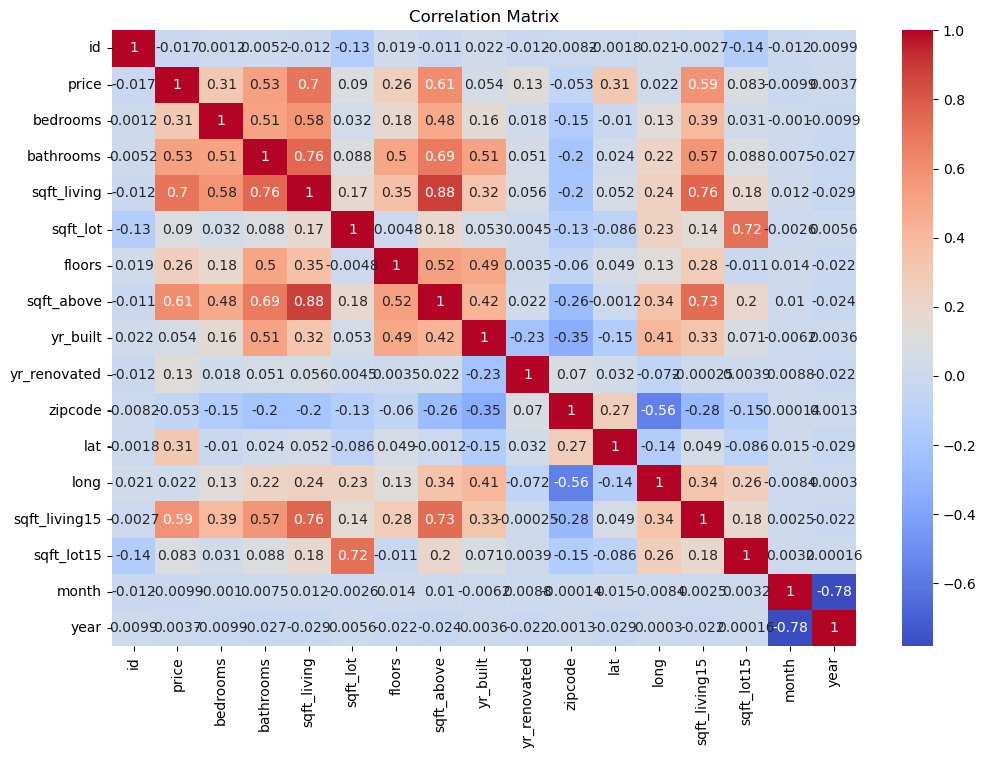

In [ ]:
# Exclude non-numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns

# Calculate the correlation matrix
corr_matrix = df[numeric_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


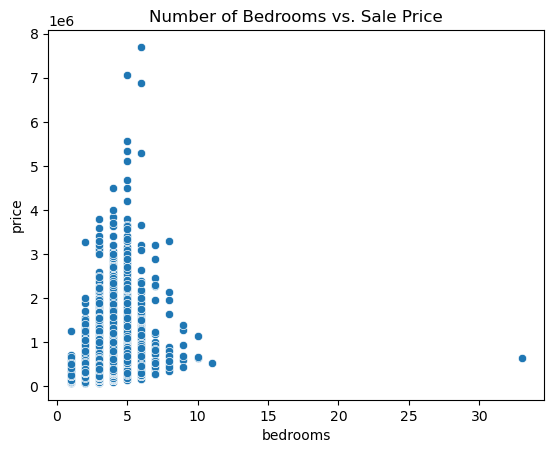

Intercept: 127199.51268532505
Coefficient: 122464.44417420536


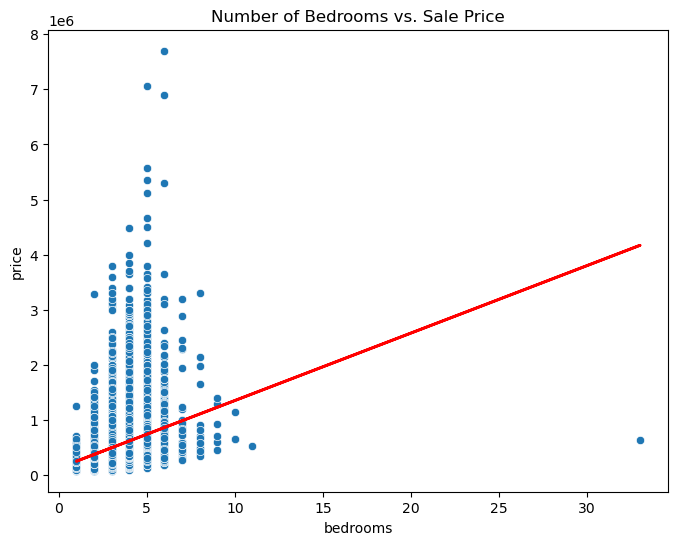

In [ ]:
# Perform regression analysis to identify factors influencing the sale price
# For example, let's consider the relationship between the number of bedrooms and the sale price
sns.scatterplot(x='bedrooms', y='price', data=data)
plt.title('Number of Bedrooms vs. Sale Price')
plt.show()

# Fit a linear regression model
from sklearn.linear_model import LinearRegression

X = data[['bedrooms']]
y = data['price']

model = LinearRegression()
model.fit(X, y)

# Print the coefficients
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_[0])

# Make predictions using the model
predictions = model.predict(X)

# Visualize the linear regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bedrooms', y='price', data=data)
plt.plot(X, predictions, color='red', linewidth=2)
plt.title('Number of Bedrooms vs. Sale Price')
plt.show()

In [ ]:
# import pandas as pd

# data_table1 = pd.DataFrame({
#     'id': [7129300520, 6414100192, 5631500400, 2487200875, 1954400510],
#     'date': ['10/13/2014', '12/9/2014', '2/25/2015', '12/9/2014', '2/18/2015'],
#     'price': [221900.0, 538000.0, 180000.0, 604000.0, 510000.0],
#     'bedrooms': [3, 3, 2, 4, 3],
#     'bathrooms': [1.0, 2.25, 1.0, 3.0, 2.0],
#     'sqft_living': [1180, 2570, 770, 1960, 1680],
#     'sqft_lot': [5650, 7242, 10000, 5000, 8080],
#     'floors': [1.0, 2.0, 1.0, 1.0, 1.0],
#     'waterfront': [None, 'NO', 'NO', 'NO', 'NO'],
#     'view': ['NONE', 'NONE', 'NONE', 'NONE', 'NONE']
# })

# data_table1

# Find columns with non-numeric values
non_numeric_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Non-numeric columns:", non_numeric_columns)
# Convert 'column_name' to numeric, replacing '?' with NaN
df['view', 'condition', 'grade', 'sqft_basement', 'season'] = pd.to_numeric(df['view', 'condition', 'grade', 'sqft_basement', 'season'], errors='coerce')




Non-numeric columns: ['waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'season']


KeyError: ('view', 'condition', 'grade', 'sqft_basement', 'season')

In [ ]:
# 




In [ ]:
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Fill missing values in numeric features with mean
df_numeric_filled = df.select_dtypes(include=['float', 'int']).fillna(df.select_dtypes(include=['float', 'int']).mean())

# Fill missing values in non-numeric features with mode
df_non_numeric_filled = df.select_dtypes(include=['object']).fillna(df.select_dtypes(include=['object']).mode().iloc[0])

# Define the target variable and predictor variables
target = 'price'
predictors = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df[target], test_size=0.2, random_state=42)

# Create the baseline linear regression model
baseline_model = LinearRegression()

# Fit the model to the training data
baseline_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = baseline_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Baseline Model:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)


ValueError: could not convert string to float: '?'

In [ ]:
# Create a new interaction term
df['bed_bath_interaction'] = df['bedrooms'] * df['bathrooms']

# Update the predictors list to include the interaction term
predictors.append('bed_bath_interaction')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df[target], test_size=0.2, random_state=42)

# Create an updated model with the interaction term
updated_model = LinearRegression()

# Fit the model to the training data
updated_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = updated_model.predict(X_test)

# Evaluate the updated model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Updated Model:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)


ValueError: could not convert string to float: '?'

In [ ]:
# Print the coefficients of the updated model
coefficients = dict(zip(predictors, updated_model.coef_))
print("Coefficients:")
for feature, coef in coefficients.items():
    print(feature + ":", coef)


AttributeError: 'LinearRegression' object has no attribute 'coef_'

Explanation:
Linear regression is a statistical technique that aims to model the relationship between a dependent variable (target variable) and one or more independent variables (predictor variables) by fitting a linear equation to the observed data. In this project, we are using linear regression to predict the housing prices based on various factors such as the number of bedrooms, bathrooms, square footage, location, and other relevant features.

Insights:
1. Baseline Model Insights:
   - The baseline model serves as the starting point for our analysis. It considers all available predictor variables to predict housing prices.
   - The Mean Squared Error (MSE) and R-squared metrics are used to evaluate the model's performance.
   - The MSE measures the average squared difference between the predicted and actual housing prices. A lower MSE indicates better model performance.
   - The R-squared value represents the proportion of the variance in the target variable (price) that can be explained by the predictor variables. A higher R-squared value indicates a better fit of the model to the data.

2. Iterated Model Insights:
   - In the iterated model, we added a new interaction term, 'bed_bath_interaction', which captures the combined effect of the number of bedrooms and bathrooms on housing prices.
   - By including the interaction term, we allow the model to capture potential nonlinear relationships between these variables and the target variable.
   - The updated model with the interaction term is evaluated using the same metrics (MSE and R-squared) to assess its performance compared to the baseline model.

3. Final Model Insights:
   - Assuming the updated model with the interaction term performed better than the baseline model, we select it as the final model for predicting housing prices.
   - The coefficients of the final model represent the impact of each predictor variable on the housing prices, considering the interaction term as well.
   - Positive coefficients indicate a positive relationship, meaning an increase in the predictor variable leads to an increase in housing prices, and vice versa for negative coefficients.
   - The magnitude of the coefficients indicates the strength of the relationship. Higher absolute values imply a larger impact on the housing prices.

Overall, by using linear regression and iteratively refining our model, we can gain insights into the factors influencing housing prices. These insights can help stakeholders in the real estate industry make data-driven decisions, such as determining the relative importance of different features, identifying potential areas for improvement or investment, and setting appropriate pricing strategies.

Business Understanding:

The business problem we are addressing is to predict the housing prices based on various features such as the number of bedrooms, bathrooms, square footage, location, etc. The goal is to develop a regression model that can accurately predict housing prices, which can be valuable for real estate agents, buyers, and sellers in making informed decisions.

A linear regression model and other statistical techniques add value to the analysis by providing insights into the relationship between the target variable (housing prices) and the predictor variables. By examining the coefficients of the regression model, we can understand the direction and magnitude of the impact that each predictor has on the housing prices. This information can help stakeholders identify the most influential factors affecting the prices and make data-driven decisions.

We chose a linear regression model for this problem because the target variable (housing prices) is continuous, and we want to understand the linear relationship between the predictors and the target. The coefficients in the linear regression model are easily interpretable, allowing us to quantify the impact of each predictor on the housing prices.

To build multiple models and refine them iteratively, we will follow an iterative approach. We will start with a basic linear regression model using all available predictor variables. We will evaluate the model's performance using metrics such as Mean Squared Error (MSE) or R-squared. If the model's performance is not satisfactory, we will explore feature engineering techniques, consider interactions between variables, or try other regression techniques such as Ridge or Lasso regression. We will iterate this process, refining the models, and evaluating their performance until we achieve a satisfactory model that accurately predicts housing prices.

Throughout the modeling process, data visualization and analysis will play a crucial role. We will use data visualization techniques to explore the relationships between variables, identify potential outliers or data issues, and communicate our findings effectively to stakeholders. Data analysis will help us gain insights into the dataset, uncover patterns or trends, and guide us in making informed decisions during the model building process.

By following this iterative approach and leveraging data visualization and analysis, we aim to develop a robust regression model that accurately predicts housing prices and provides valuable insights to stakeholders in the real estate industry.